In [ ]:
import os

#Adding all the required files

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "/Users/ashis/Downloads/archive/Train/Train/Healthy"
train_files_powdery = "/Users/ashis/Downloads/archive/Train/Train/Powdery"
train_files_rust = "/Users/ashis/Downloads/archive/Train/Train/Rust"
train_files_early_blight = "/Users/ashis/Downloads/archive/Train/Train/Early_Blight"
train_files_late_blight = "/Users/ashis/Downloads/archive/Train/Train/Late_Blight"
train_files_tomato_septoria_leaf_spot = "/Users/ashis/Downloads/archive/Train/Train/Tomato_Septoria_Leaf_Spot"
train_files_pepper_bell_bacterial_spot = "/Users/ashis/Downloads/archive/Train/Train/Pepper_Bell_Bacterial_Spot"

test_files_healthy = "/Users/ashis/Downloads/archive/Test/Test/Healthy"
test_files_powdery = "/Users/ashis/Downloads/archive/Test/Test/Powdery"
test_files_rust = "/Users/ashis/Downloads/archive/Test/Test/Rust"
test_files_early_blight = "/Users/ashis/Downloads/archive/Test/Test/Early_Blight"
test_files_late_blight = "/Users/ashis/Downloads/archive/Test/Test/Late_Blight"
test_files_tomato_septoria_leaf_spot = "/Users/ashis/Downloads/archive/Test/Test/Tomato_Septoria_Leaf_Spot"
test_files_pepper_bell_bacterial_spot = "/Users/ashis/Downloads/archive/Test/Test/Pepper_Bell_Bacterial_Spot"

valid_files_healthy = "/Users/ashis/Downloads/archive/Validation/Validation/Healthy"
valid_files_powdery = "/Users/ashis/Downloads/archive/Validation/Validation/Powdery"
valid_files_rust = "/Users/ashis/Downloads/archive/Validation/Validation/Rust"
valid_files_early_blight = "/Users/ashis/Downloads/archive/Validation/Validation/Early_Blight"
valid_files_late_blight = "/Users/ashis/Downloads/archive/Validation/Validation/Late_Blight"
valid_files_tomato_septoria_leaf_spot = "/Users/ashis/Downloads/archive/Validation/Validation/Tomato_Septoria_Leaf_Spot"
valid_files_pepper_bell_bacterial_spot = "/Users/ashis/Downloads/archive/Validation/Validation/Pepper_Bell_Bacterial_Spot"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))
print("Number of early blight leaf images in training set", total_files(train_files_early_blight))
print("Number of late blight leaf images in training set", total_files(train_files_late_blight))
print("Number of tomato septoria leaf spot images in training set", total_files(train_files_tomato_septoria_leaf_spot))
print("Number of pepper bell bacterial spot images in training set", total_files(train_files_pepper_bell_bacterial_spot))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))
print("Number of early blight leaf images in test set", total_files(test_files_early_blight))
print("Number of late blight leaf images in test set", total_files(test_files_late_blight))
print("Number of tomato septoria leaf spot images in test set", total_files(test_files_tomato_septoria_leaf_spot))
print("Number of pepper bell bacterial spot images in test set", total_files(test_files_pepper_bell_bacterial_spot))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))
print("Number of early blight leaf images in validation set", total_files(valid_files_early_blight))
print("Number of late blight leaf images in validation set", total_files(valid_files_late_blight))
print("Number of tomato septoria leaf spot images in validation set", total_files(valid_files_tomato_septoria_leaf_spot))
print("Number of pepper bell bacterial spot images in validation set", total_files(valid_files_pepper_bell_bacterial_spot))

Number of healthy leaf images in training set 958
Number of powder leaf images in training set 527
Number of rusty leaf images in training set 534
Number of early blight leaf images in training set 700
Number of late blight leaf images in training set 700
Number of tomato septoria leaf spot images in training set 800
Number of pepper bell bacterial spot images in training set 700
Number of healthy leaf images in test set 250
Number of powder leaf images in test set 135
Number of rusty leaf images in test set 132
Number of early blight leaf images in test set 150
Number of late blight leaf images in test set 150
Number of tomato septoria leaf spot images in test set 250
Number of pepper bell bacterial spot images in test set 147
Number of healthy leaf images in validation set 150
Number of powder leaf images in validation set 150
Number of rusty leaf images in validation set 150
Number of early blight leaf images in validation set 150
Number of late blight leaf images in validation set 

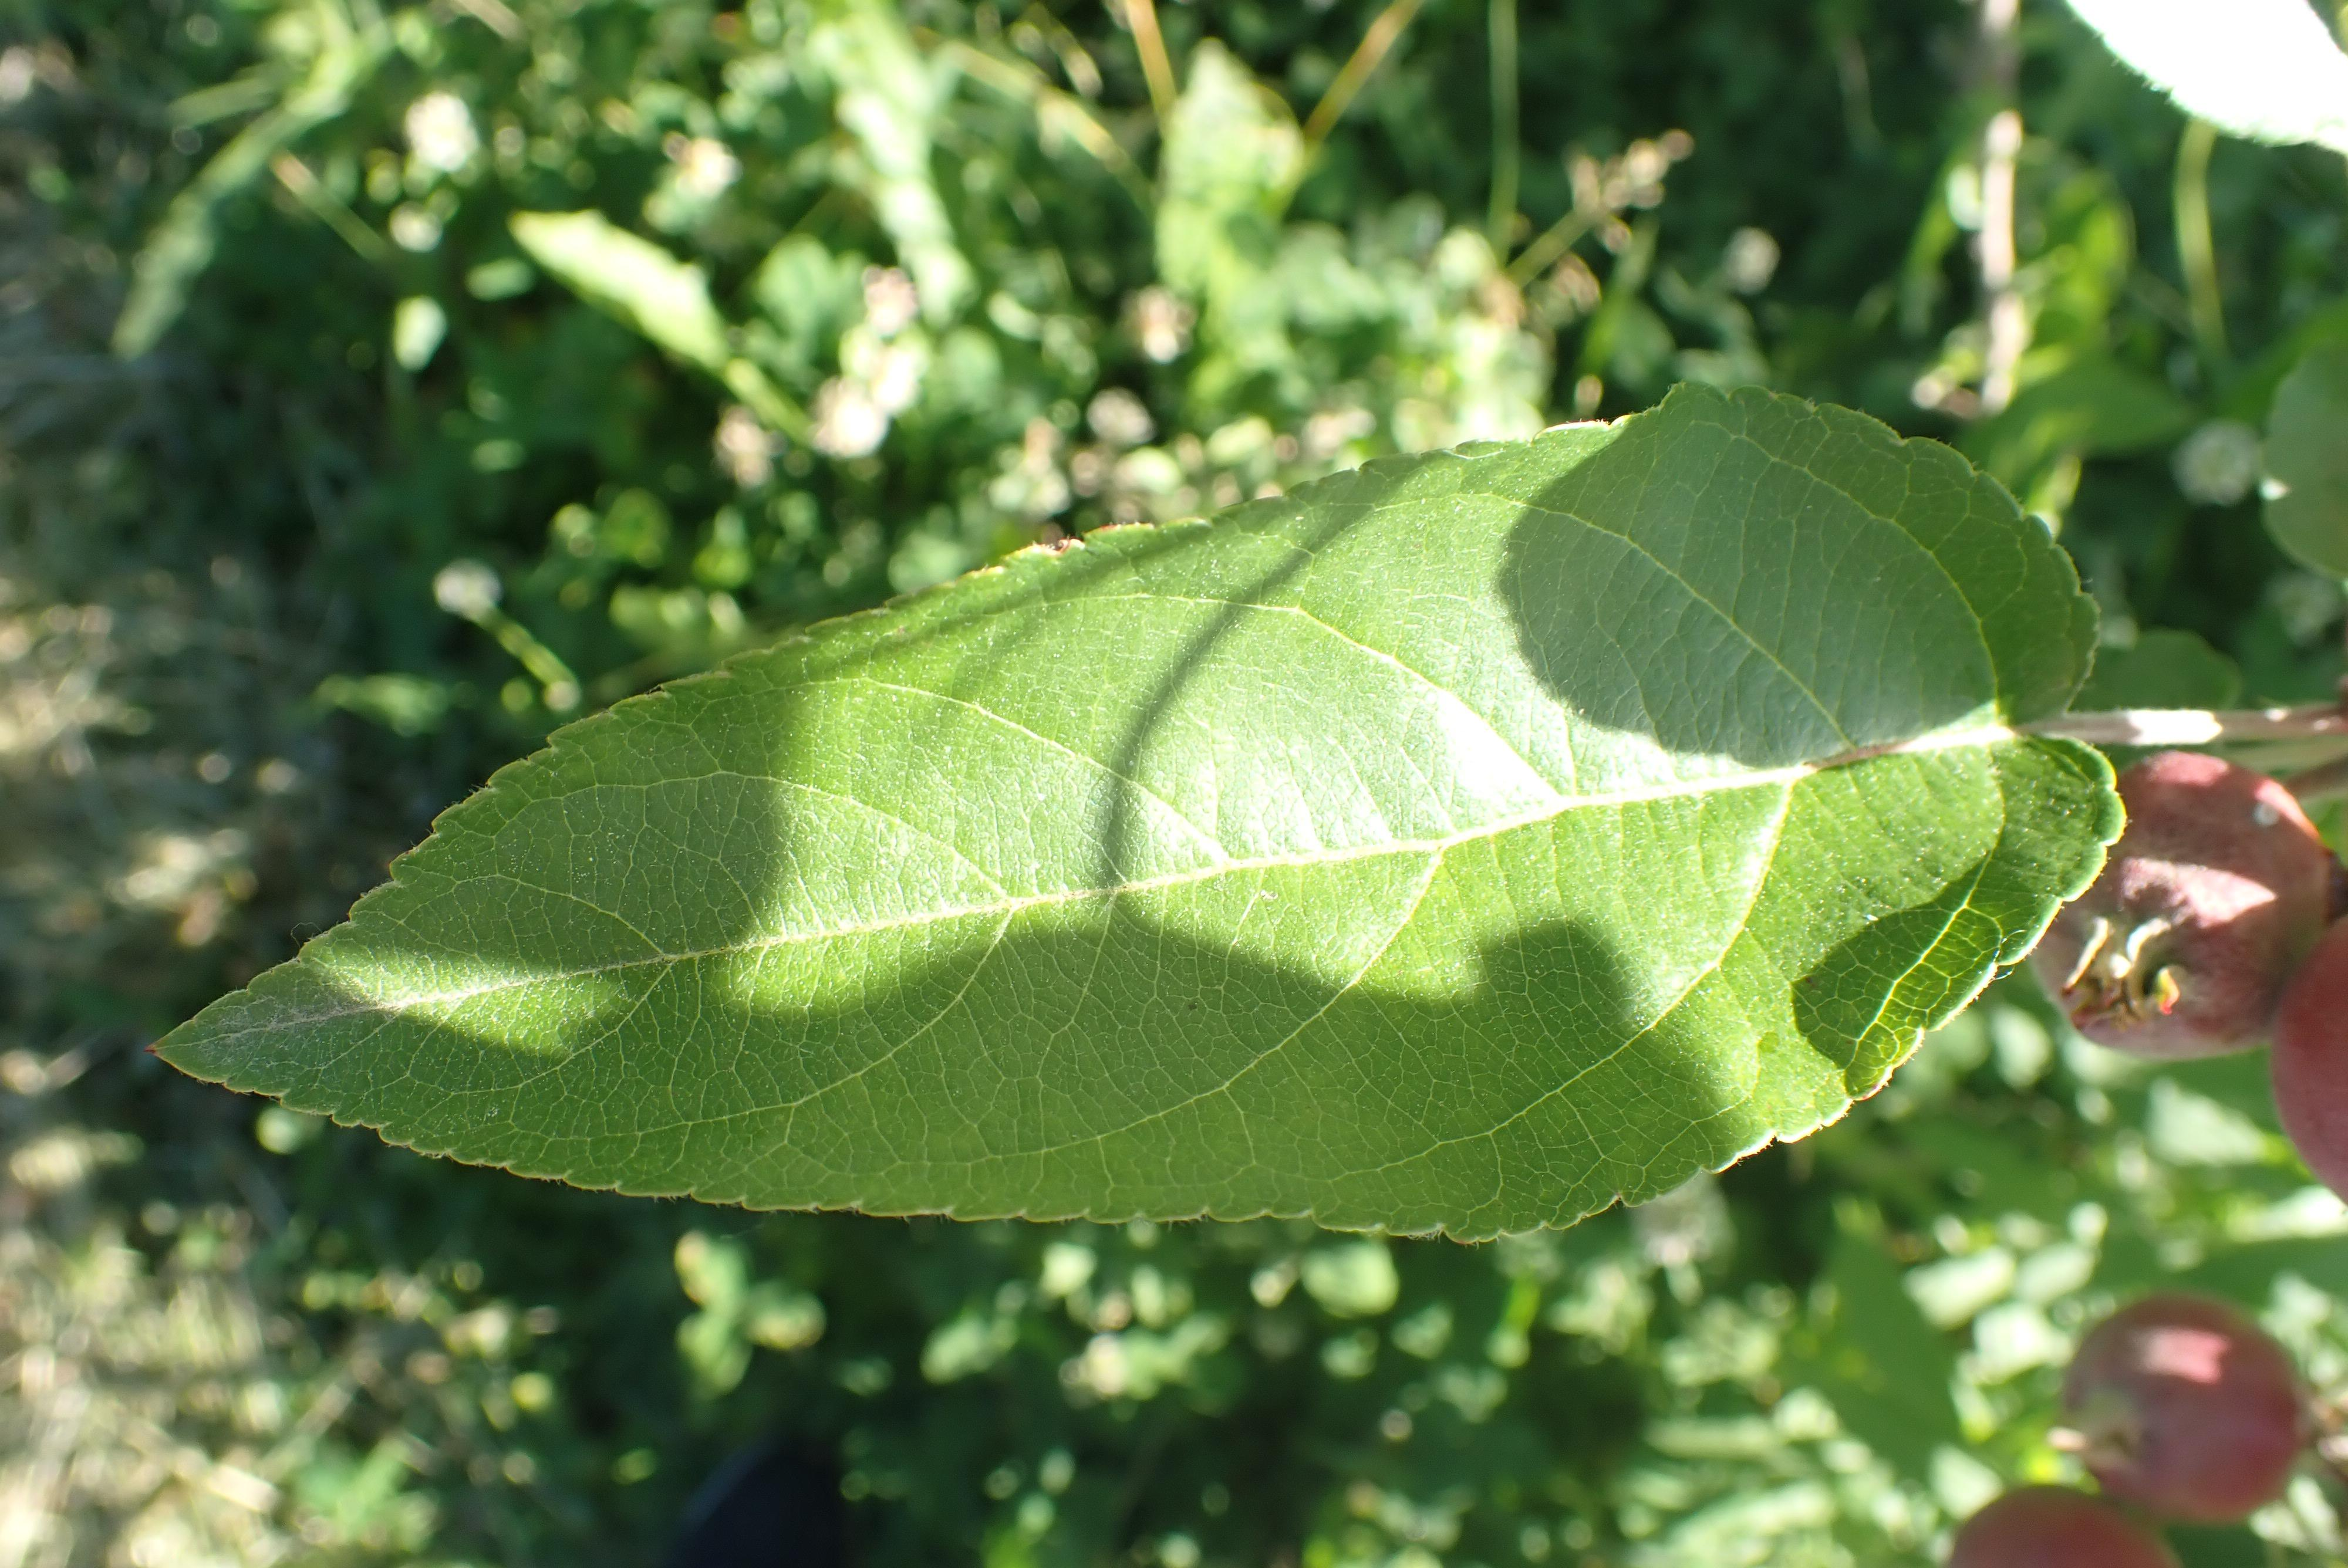

In [ ]:
from PIL import Image
import IPython.display as display

#Displaying Images

image_path = "/Users/ashis/Downloads/archive/Train/Train/Healthy/9fcb68a0fc2a60ae.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

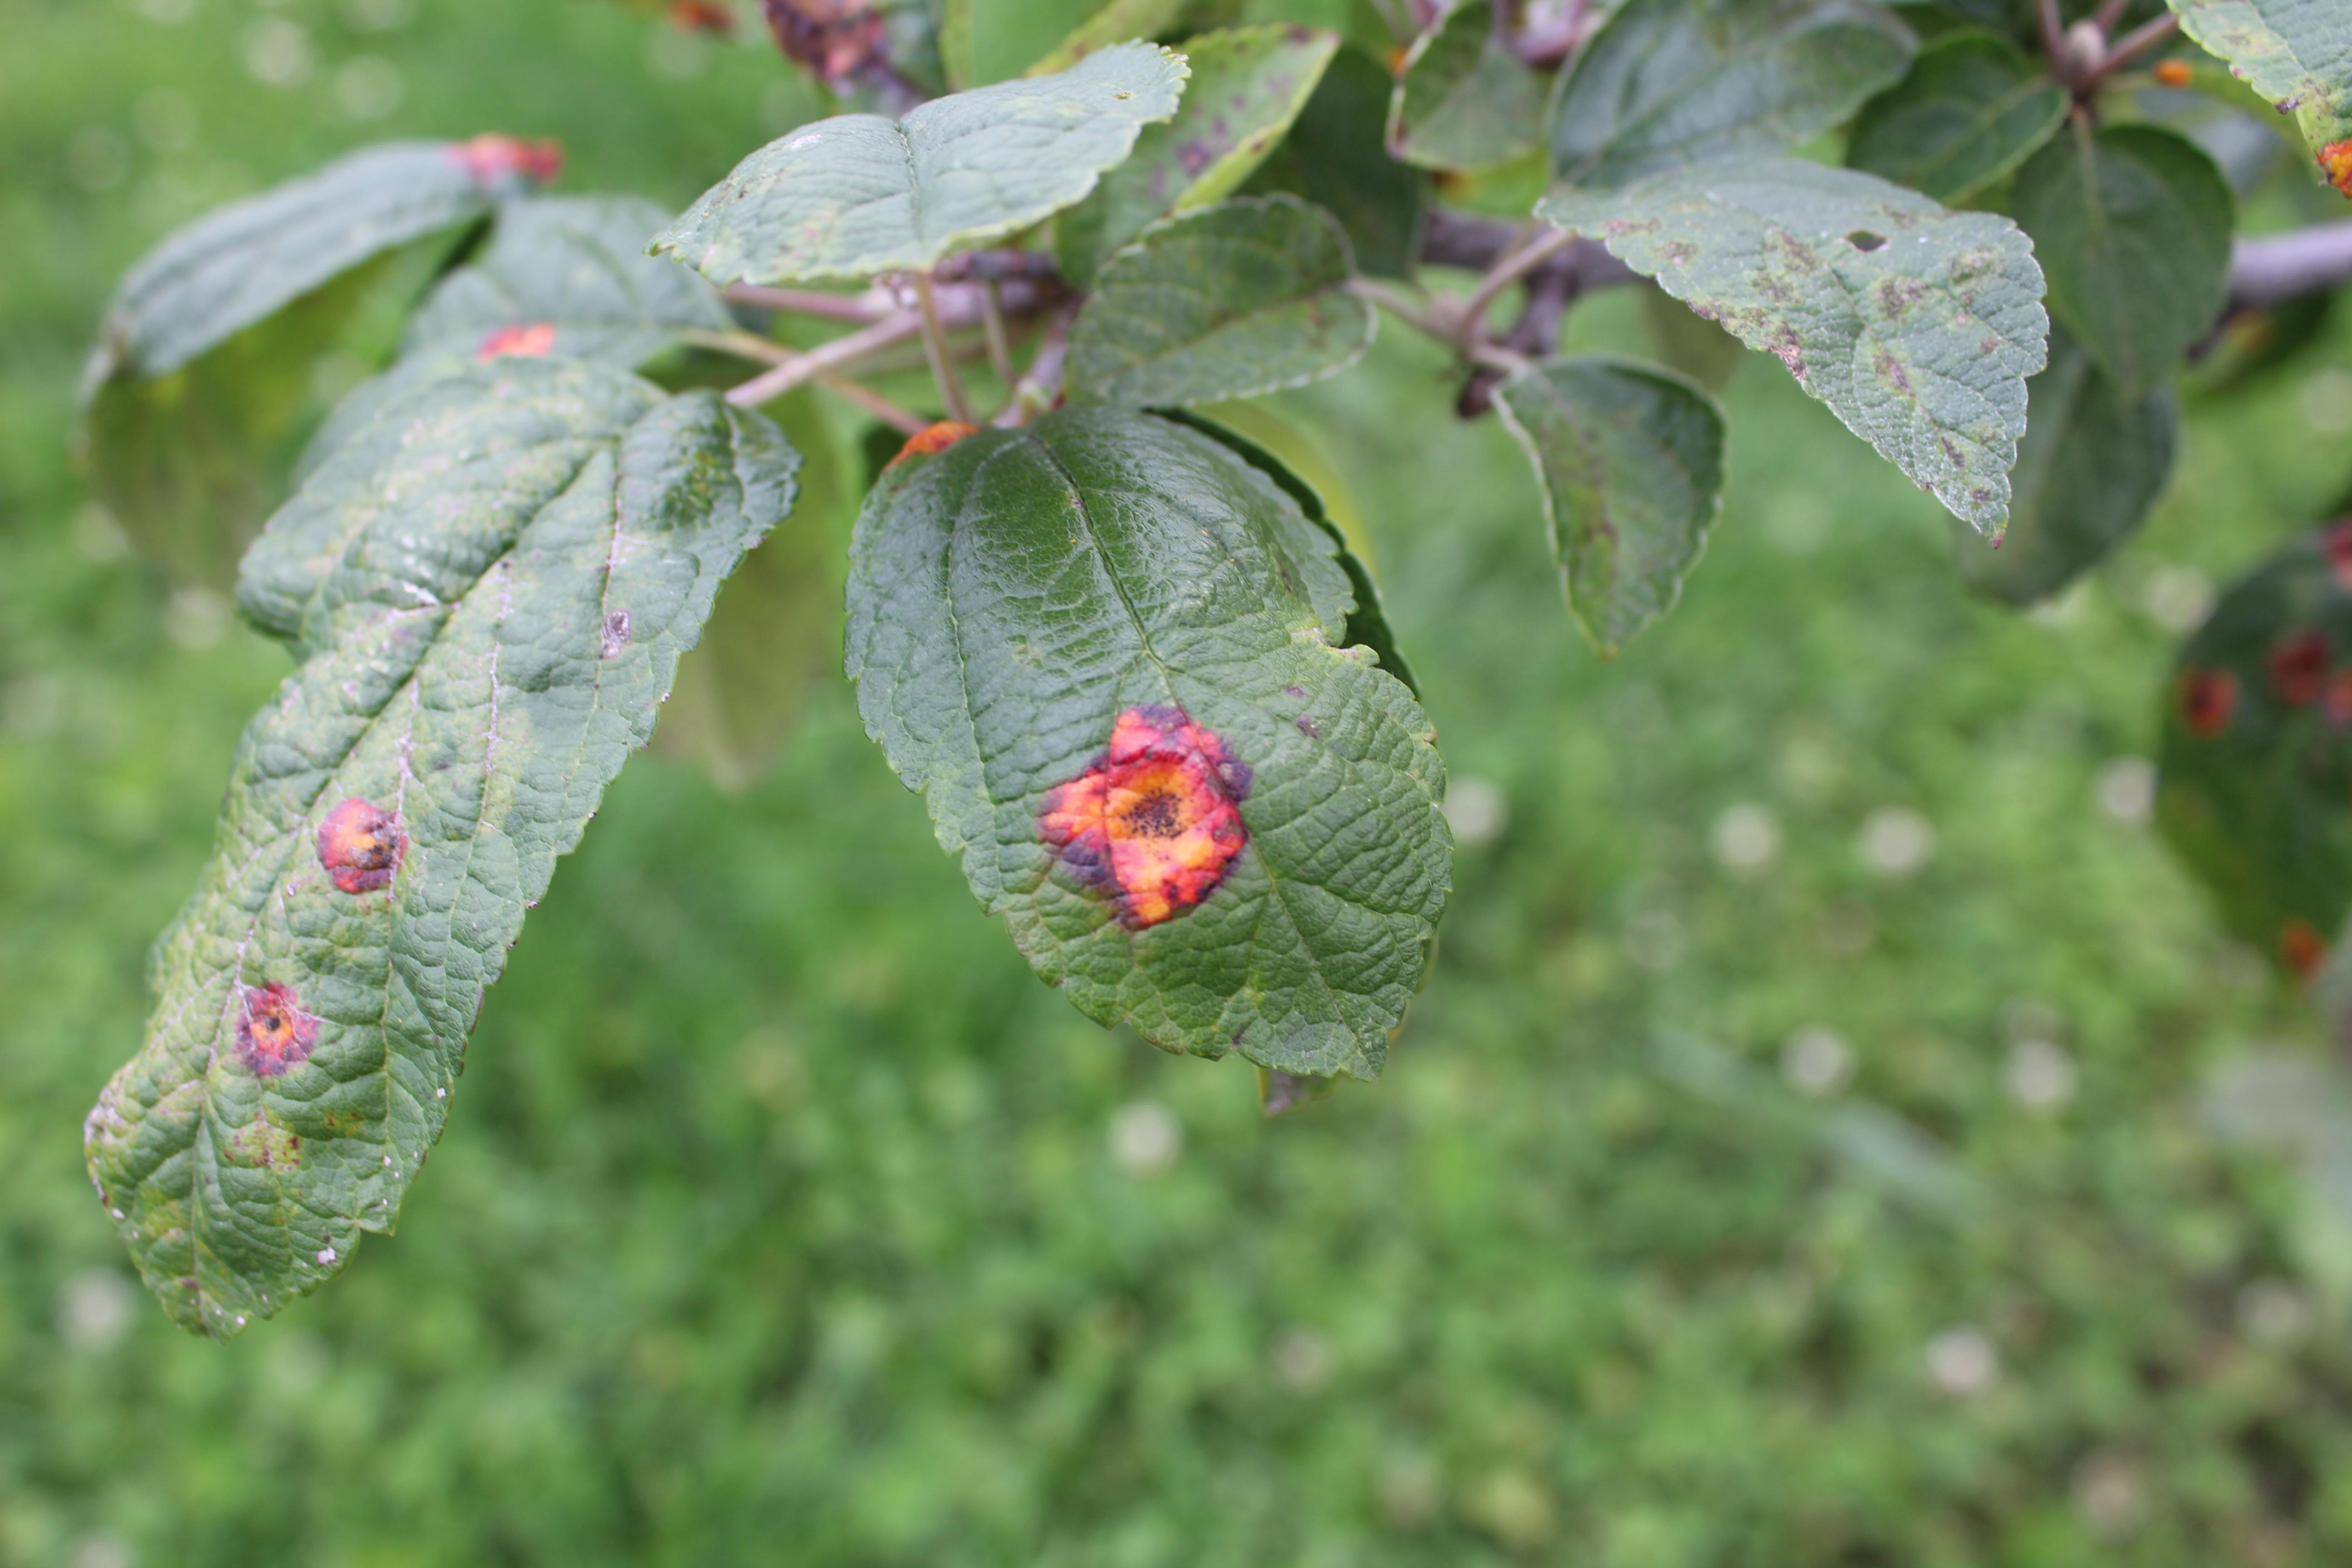

In [3]:
image_path = "/Users/ashis/Downloads/archive/Train/Train/Rust/f4c00e3edcca3a39.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type:ignore
#Normalization + Augmentation (Model sees different version of image while training)
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
#Normalization
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Creating data generators to load images
#Feeds model data iin batches along with class labels
train_generator = train_datagen.flow_from_directory("/Users/ashis/Downloads/archive/Train/Train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory("/Users/ashis/Downloads/archive/Validation/Validation",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 4919 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

#Extracts simple features (edges, textures)
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(225,225,3)))
model.add(MaxPooling2D(2,2))   #Reduces size, focus on important features

#Extracts more complex features
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

#Extracts even more complex patterns
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

#Extracts high-level features
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

#Converts 3D feature maps into a 1D vector.
model.add(Flatten())
#Fully connected layer with 512 neurons, relu activation adds non-linearity
model.add(Dense(512, activation='relu'))
#Output layer with 7 neurons → one for each class, softmax converts outputs to probabilities that sum to 1
model.add(Dense(7, activation='softmax'))


c:\Users\ashis\Downloads\plant_disease_detection-main\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Training this model using the Adam optimizer, minimize the categorical crossentropy loss, and track the accuracy during training
#The loss function measures how far the model's predictions are from the true labels
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#This ensures the model pays more attention to minority classes during training, which can improve accuracy on imbalanced datasets

from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',                  #tells scikit-learn to automatically adjust weights inversely proportional to class frequencies.
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: np.float64(1.0151020408163265), 1: np.float64(0.7417238294065016), 2: np.float64(1.0151020408163265), 3: np.float64(1.0151020408163265), 4: np.float64(1.2209131075110458), 5: np.float64(1.3306581059390048), 6: np.float64(0.8882142857142857)}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #type:ignore

#The model with the best validation accuracy is saved
mc = ModelCheckpoint(
    "best_model.h5",
    monitor='val_accuracy',
    save_best_only=True
)


In [ ]:
#Passing the training data 15 times
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    class_weight=class_weights,
    callbacks=[mc]
)


Epoch 1/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3475 - loss: 1.6346

156/156 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.4914 - loss: 1.2346 - val_accuracy: 0.5790 - val_loss: 1.1942
Epoch 2/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7072 - loss: 0.7076

156/156 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.7543 - loss: 0.6117 - val_accuracy: 0.7467 - val_loss: 0.9566
Epoch 3/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8432 - loss: 0.4166

156/156 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.8554 - loss: 0.3828 - val_accuracy: 0.8000 - val_loss: 0.5455
Epoch 4/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8796 - loss: 0.3266

156/156 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.8810 - loss: 0.3077 - val_accuracy: 0.8686 - val_loss: 0.3332
Epoch 5/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9178 - loss: 0.2101 - val_accuracy: 0.8248 - val_loss: 0.4799
Epoch 6/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.9331 - loss: 0.1742 - val_accuracy: 0.8238 - val_loss: 0.4756
Epoch 7/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9304 - loss: 0.1903

156/156 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.9300 - loss: 0.1900 - val_accuracy: 0.9029 - val_loss: 0.2663
Epoch 8/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9534 - loss: 0.1294 - val_accuracy: 0.8514 - val_loss: 0.4325
Epoch 9/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9476 - loss: 0.1384

156/156 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.9501 - loss: 0.1414 - val_accuracy: 0.9067 - val_loss: 0.2656
Epoch 10/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.9590 - loss: 0.1088 - val_accuracy: 0.8638 - val_loss: 0.5490
Epoch 11/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9549 - loss: 0.1103

156/156 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9638 - loss: 0.0945 - val_accuracy: 0.9324 - val_loss: 0.1821
Epoch 12/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9640 - loss: 0.0990 - val_accuracy: 0.9219 - val_loss: 0.2671
Epoch 13/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9767 - loss: 0.0640 - val_accuracy: 0.9324 - val_loss: 0.2297
Epoch 14/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9715 - loss: 0.0807

156/156 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.9666 - loss: 0.0917 - val_accuracy: 0.9410 - val_loss: 0.1851
Epoch 15/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9851 - loss: 0.0440 - val_accuracy: 0.9362 - val_loss: 0.1905


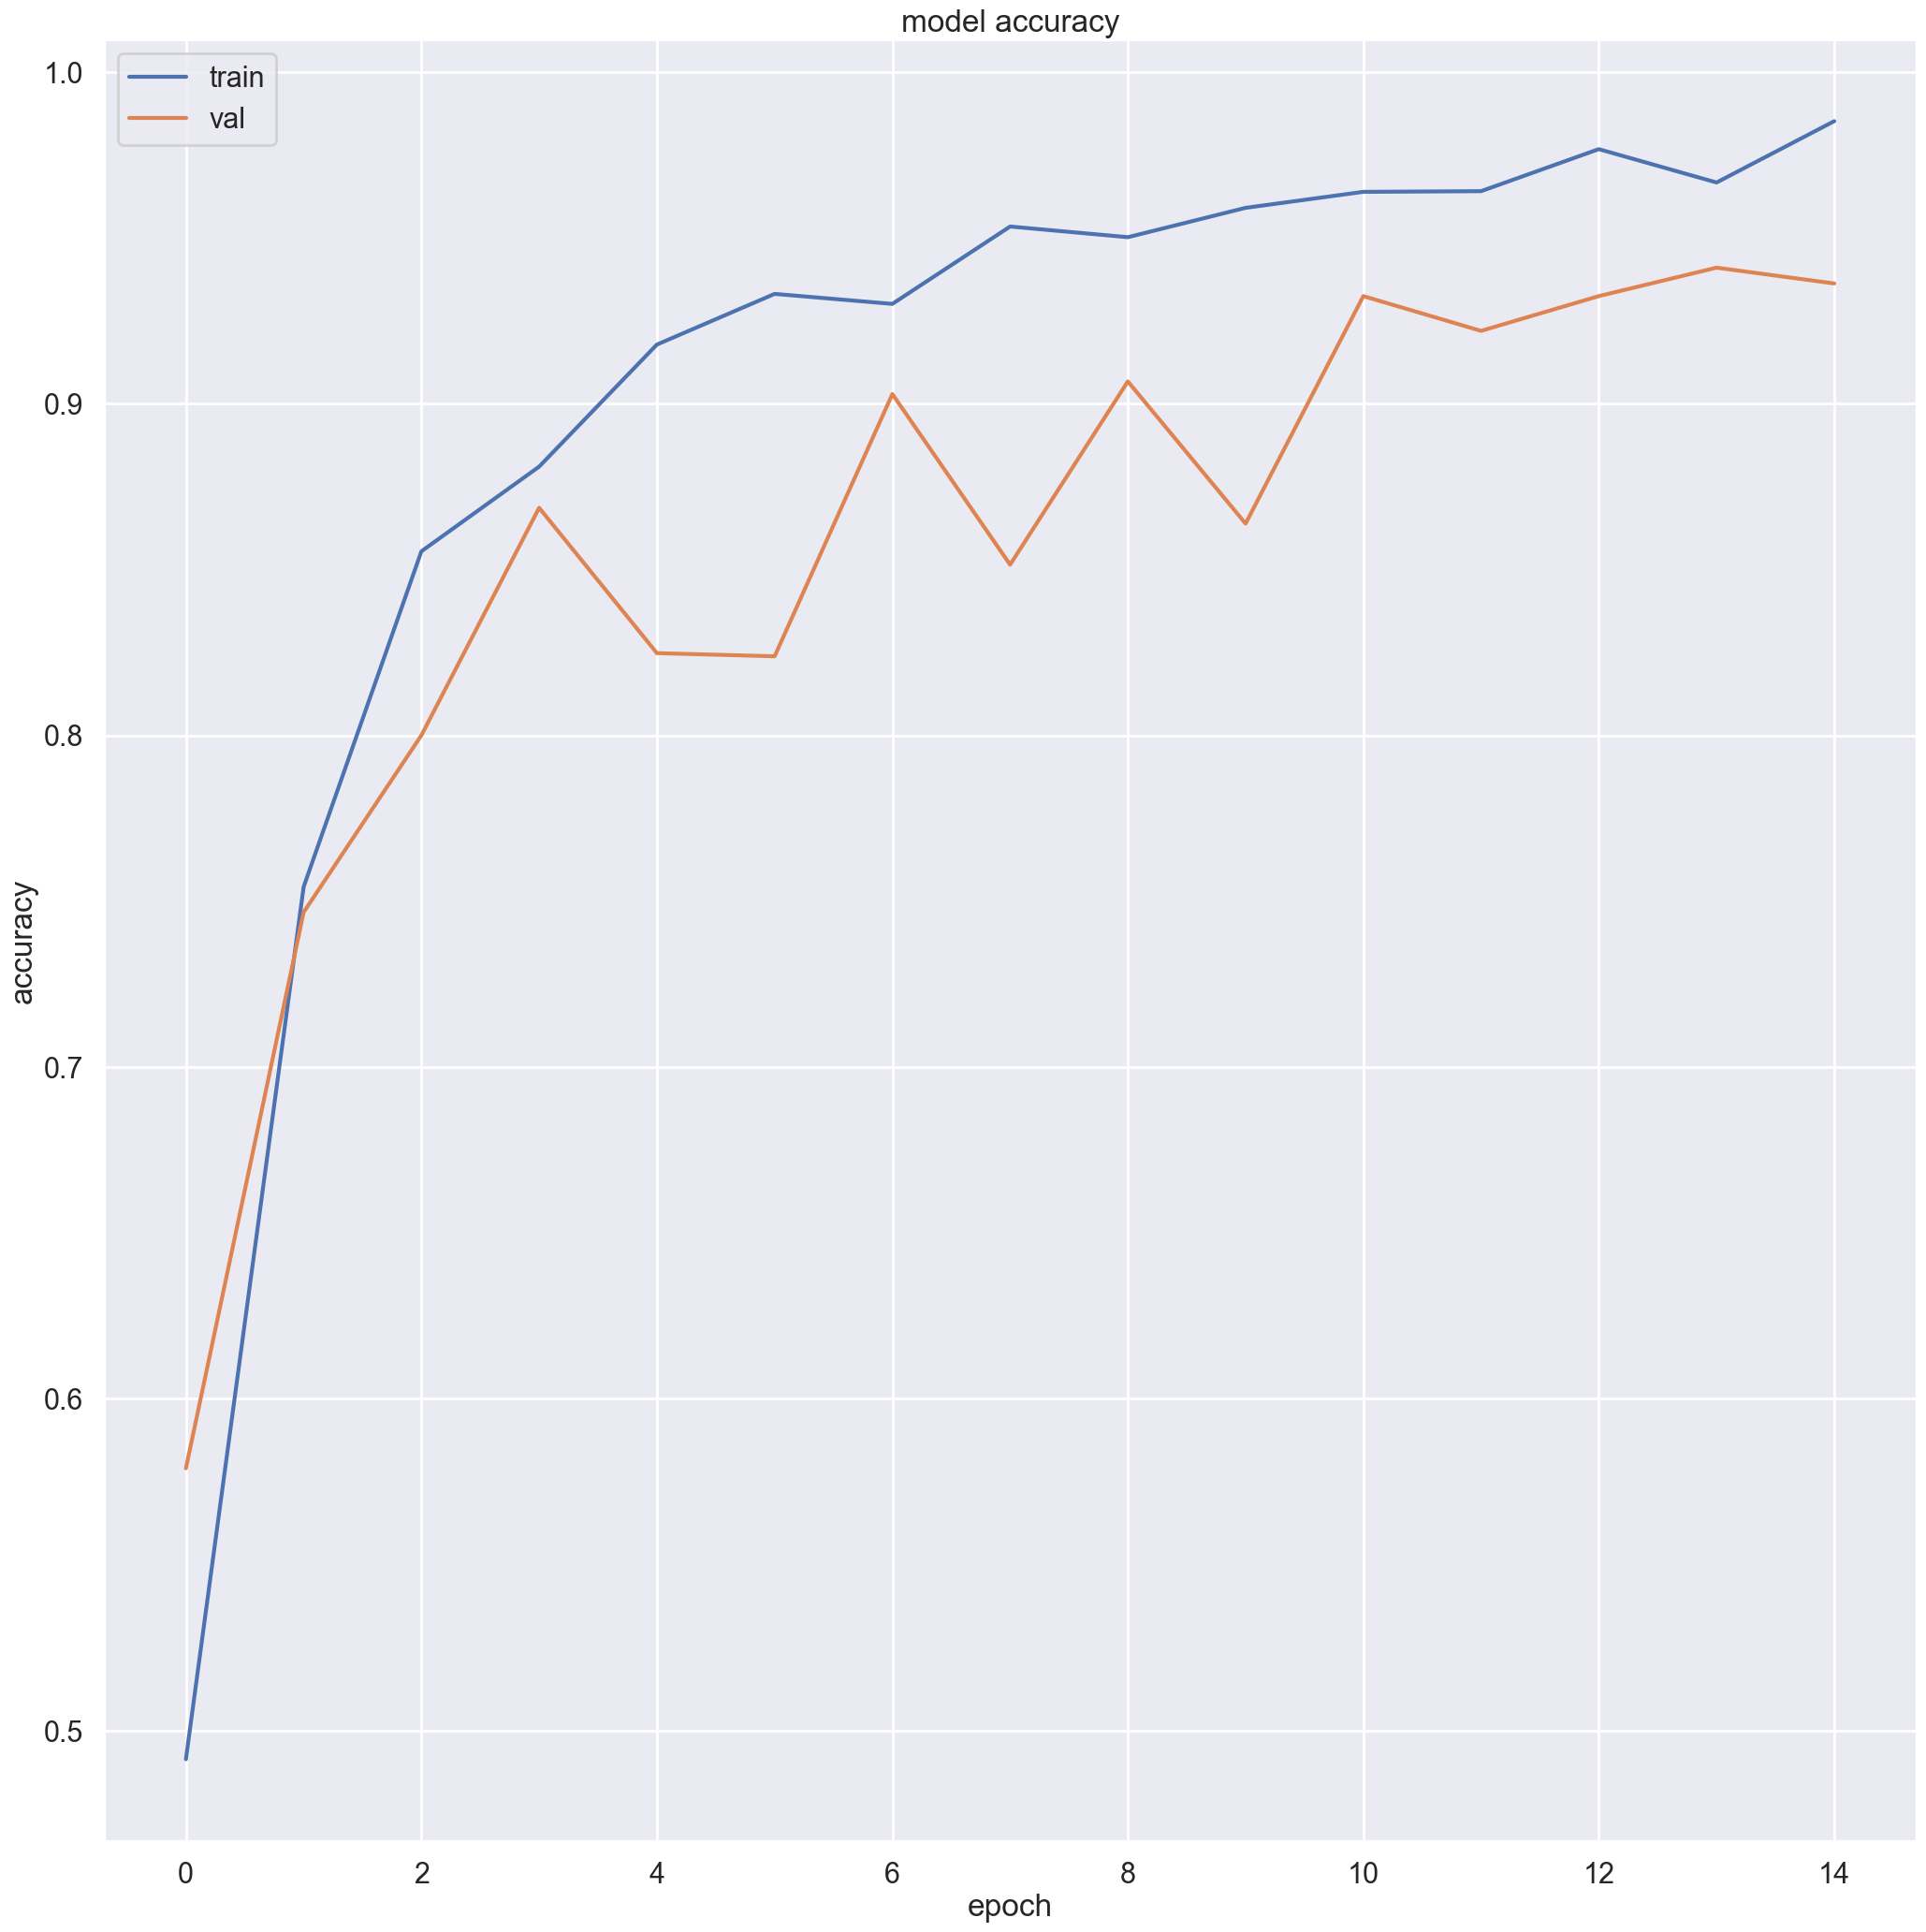

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#For better appearance of graph
import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)   #dpi=dots per inch , dpi = 100 is 100 pixels per inch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:

from keras.preprocessing.image import load_img, img_to_array
import numpy as np

#Defining a function to prepreocess input image
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image("/Users/ashis/Downloads/archive/Test/Test/Pepper_Bell_Bacterial_Spot/41da62b7-c3af-4604-aaa5-c457356e04bd___JR_B.Spot 9034.JPG")


In [ ]:
#Gives image to model
predictions = model.predict(x)
#Removes batch dimensions
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([1.1036282e-11, 5.4254552e-11, 6.2028555e-10, 9.9999869e-01,
       1.3321161e-11, 7.6646369e-09, 1.2953476e-06], dtype=float32)

In [23]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
print(labels)

{0: 'Early_Blight', 1: 'Healthy', 2: 'Late_Blight', 3: 'Pepper_Bell_Bacterial_Spot', 4: 'Powdery', 5: 'Rust', 6: 'Tomato_Septoria_Leaf_Spot'}


In [ ]:
#np.argmax gives the index of the largest probability, i.e., the predicted class.
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Pepper_Bell_Bacterial_Spot


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model #type:ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = load_model("best_model.h5")
print("Loaded best model!")

validation_generator.shuffle = False

#Getting actual values
validation_generator.reset()
y_true = validation_generator.classes

#Getting predicted values for same data as shuffle is off
validation_generator.reset()
y_pred_prob = model.predict(validation_generator)

#Converts probability to class label by picking highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

#Calculating evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')    #Weighted means each class contributes based on its size.
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

#Printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Loaded best model!
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 489ms/step
Accuracy: 0.940952380952381
Precision: 0.9433544828477047
Recall: 0.940952380952381
F1 Score: 0.9402548257951129
